In [12]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
years = ['1869', '', '', '', '', '', '', '', '', '',
         '1879', '', '', '', '', '', '', '', '', '',
         '1889', '', '', '', '', '', '', '', '', '',
         '1899', '', '', '', '', '', '', '', '', '',
         '1909', '', '', '', '', '', '', '', '', '',
         '1919', '', '', '', '', '', '', '', '', '',
         '1929', '', '', '', '', '', '', '', '', '',
         '1939', '', '', '', '', '', '', '', '', '',
         '1949', '', '', '', '', '', '', '', '', '',
         '1959', '', '', '', '', '', '', '', '', '',
         '1969', '', '', '', '', '', '', '', '', '',
         '1979', '', '', '', '', '', '', '', '', '',
         '1989', '', '', '', '', '', '', '', '', '',
         '1999', '', '', '', '', '', '', '', '', '',
         '2009', '', '', '', '', '', '', '', '', '',
         '', '', '2021']

In [14]:
# Opening messy data
brisbane_rainfall_mess = pd.read_csv('Brisbane_end.csv', header=None, sep=';', encoding='utf-8')
# Converting string values to float & replace ',' to '.'
brisbane_rainfall = (brisbane_rainfall_mess.replace(',','.', regex=True).astype(float))

# Median day rainfall
brisbane_rainfall_median = brisbane_rainfall.median()
# Sum year rainfall
brisbane_rainfall_sum = brisbane_rainfall.aggregate(sum)

In [15]:
### Plot with yearly summ rainfall amount, color bars with annotations

<Figure size 1440x4320 with 0 Axes>

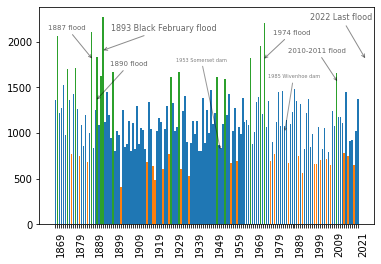

In [73]:
# Parameters for color bar types
high_value = 1580
low_value = 790
tick = np.arange(0,153, 1)
hum_high = np.ma.masked_where(brisbane_rainfall_sum < high_value, brisbane_rainfall_sum)
hum_low = np.ma.masked_where(brisbane_rainfall_sum > low_value, brisbane_rainfall_sum)
hum_middle = np.ma.masked_where((brisbane_rainfall_sum < low_value) | (brisbane_rainfall_sum > high_value),
                                 brisbane_rainfall_sum)

# Plot presets
plt.figure(figsize=(20, 60))
fig, ax = plt.subplots()
ax.set_xticks(tick)
ax.set_xticklabels(labels=years)
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Annotates for impotant events
ax.annotate('1887 flood', size=7, alpha=0.6, xy=(19, 1800), xycoords='data', xytext=(-45, 30),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))
ax.annotate('1890 flood', size=7, alpha=0.6, xy=(20, 1350), xycoords='data', xytext=(15, 35),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))
ax.annotate('1893 Black February flood', size=8, alpha=0.6, xy=(23, 1900), xycoords='data', xytext=(10, 20),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))
ax.annotate('1953 Somerset dam', size=5, alpha=0.5, xy=(83, 800), xycoords='data', xytext=(-45, 90),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.4, arrowstyle="->"))
ax.annotate('1974 flood', size=7, alpha=0.6, xy=(104, 1800), xycoords='data', xytext=(10, 25),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))
ax.annotate('1985 Wivenhoe dam', size=5, alpha=0.5, xy=(115, 1000), xycoords='data', xytext=(-17, 55),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.4, arrowstyle="->"))
ax.annotate('2010-2011 flood', size=7, alpha=0.6, xy=(142, 1550), xycoords='data', xytext=(-50, 30),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))
ax.annotate('2022 Last flood', size=8, alpha=0.6, xy=(156, 1800), xycoords='data', xytext=(-56, 40), 
            textcoords='offset points',arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))

# Rainfall level bars sort with colors
im = ax.bar(tick, hum_middle)
im = ax.bar(tick, hum_low)
im = ax.bar(tick, hum_high)

# Saving plot
fig.savefig('_Brisbane_sum_790-1580+text.png', dpi=600, bbox_inches="tight")

In [8]:
### Plot with yearly median rainfall amount, color bars

<Figure size 1440x4320 with 0 Axes>

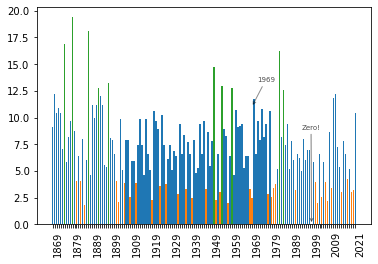

In [81]:
# Parameters for color bar types
high_value = 12.6
low_value = 4.2
tick = np.arange(0,153, 1)
hum_high = np.ma.masked_where(brisbane_rainfall_median < high_value, brisbane_rainfall_median)
hum_low = np.ma.masked_where(brisbane_rainfall_median > low_value, brisbane_rainfall_median)
hum_middle = np.ma.masked_where((brisbane_rainfall_median < low_value) | (brisbane_rainfall_median > high_value),
                                 brisbane_rainfall_median)

# Plot presets
plt.figure(figsize=(20, 60))
fig, ax = plt.subplots()
ax.set_xticks(tick)
ax.set_xticklabels(labels=years)
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Annotates for impotant event
ax.annotate('Zero!', size=7, alpha=0.7, xy=(130, 0), xycoords='data', xytext=(-10, 95),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.5, arrowstyle="->"))
ax.annotate('1969', size=7, alpha=0.7, xy=(100, 11), xycoords='data', xytext=(5, 25),
            textcoords='offset points', arrowprops=dict(facecolor='black', alpha=0.45, arrowstyle="->"))

# Rainfall level bars sort with colors
im = ax.bar(tick, hum_middle)
im = ax.bar(tick, hum_low)
im = ax.bar(tick, hum_high)

# Saving plot
#fig.savefig('_Brisbane_med_4.2-12.6.png', dpi=600, bbox_inches="tight")

In [10]:
### Heatmap with weekly rainfall amount + colorbar

<Figure size 1440x4320 with 0 Axes>

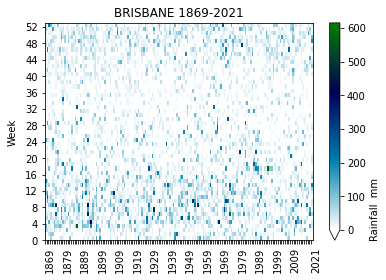

In [11]:
plt.figure(figsize=(20, 60))
fig, ax = plt.subplots()

# Show X-ticks and labels
ax.set(title='BRISBANE 1869-2021')
ax.set_xticks(np.arange(0,153, 1))
ax.set_xticklabels(labels=years)
# Rotate the tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Show Y-ticks and labels
ax.set_yticks(np.arange(0, 53, 4))
ax.set_ylabel('Week', labelpad=8)

# Heatmap & colorbar settings
## Try:'viridis_r', 'twilight', 'ocean_r', 'cividis_r', 'bone_r', 'YlGnBu', 'Blues'
cs = ax.pcolormesh(brisbane_rainfall, cmap='ocean_r')
cbar = fig.colorbar(cs, ticks=[0, 100, 200, 300, 400, 500, 600], ax=ax, extend='min')
cbar.ax.set_ylabel('Rainfall  mm', loc='bottom')

# Saving heatmap
fig.savefig('BRISBANE_ocean_r.png', dpi=600, bbox_inches="tight")

In [12]:
### Heatmap with seasonly rainfall amount + colorbar

In [13]:
# Opening messy 4 seasons data (dec-feb)+(mar-may)+(jun-aug)+(sep-nov)
brisbane_rainfall_mess_4s = pd.read_csv('Brisbane_end_4seasons.csv', header=None, sep=';', encoding='utf-8')
# Converting string values to float & replace ',' to '.'
brisbane_rainfall_4s = (brisbane_rainfall_mess_4s.replace(',','.', regex=True).astype(float))

<Figure size 720x4320 with 0 Axes>

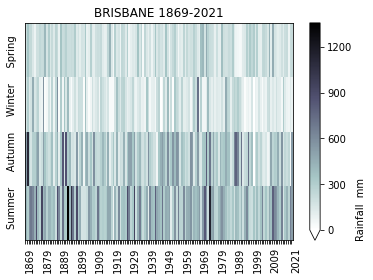

In [14]:
plt.figure(figsize=(10, 60))
fig, ax = plt.subplots()

# Show X-ticks and labels
ax.set(title='BRISBANE 1869-2021')
ax.set_xticks(np.arange(0,153, 1))
ax.set_xticklabels(labels=years)
# Rotate the tick labels
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Show Y-ticks and labels
ax.set_yticks(np.arange(0, 0))
ax.set_ylabel('Summer     Autumn     Winter     Spring', labelpad=8)

# Heatmap & colorbar settings
## Try:'viridis_r', 'twilight', 'ocean_r', 'cividis_r', 'bone_r', 'YlGnBu', 'Blues'
cs = ax.pcolormesh(brisbane_rainfall_4s, cmap='bone_r')
cbar = fig.colorbar(cs, ticks=[0, 300, 600, 900, 1200], ax=ax, extend='min')
cbar.ax.set_ylabel('Rainfall  mm', loc='bottom')

# Saving heatmap
#fig.savefig('BRISBANE_4seasons_bone_r.png', dpi=600, bbox_inches="tight")